In [13]:
# chapter 22 重回帰分析

In [14]:
# 物理、化学、統計のテスト点数から数学の点数を予測したい
# 特徴量の数(n)＝3（物理、化学、統計）
# データのサイズ(m)＝99（生徒99名）
# ターゲット(y)＝数学の点数

In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
# 先頭はヘッダ
data2 = np.loadtxt("007-02.csv", delimiter=",", skiprows=1)
# 特徴量の物理、科学、統計取り出し
x = data2[:, :3]
# 目的変数の数学（正解ラベル）
y = data2[:, 3]
m = len(y)

In [17]:
x[:10], y[:10], data2.size, data2.shape, m

(array([[64., 67., 69.],
        [74., 74., 63.],
        [60., 59., 55.],
        [84., 88., 89.],
        [80., 88., 78.],
        [75., 68., 68.],
        [66., 59., 55.],
        [77., 71., 66.],
        [70., 71., 60.],
        [89., 84., 80.]]),
 array([68., 67., 57., 91., 82., 63., 65., 73., 67., 85.]),
 396,
 (99, 4),
 99)

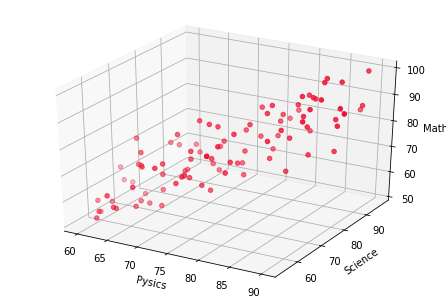

In [18]:
# 点数をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2[:, 0], data2[:, 1], data2[:, 3], color='#ef1234')
# ３次元なので物理、科学、数学
ax.set_xlabel("Pysics")
ax.set_ylabel("Science")
ax.set_zlabel("Math")
plt.show()

In [19]:
# chapter 23 特徴量の正規化

In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
# 標準化（Z-score Normalization）
#   x1 = (x1 − xmean) / std
# ・stdとはStandard Deviationの略で「標準偏差」
# ・標準偏差とは「データのばらつき具合を表す指標」
# ・標準化ではxの平均を0、標準偏差を1となるような処理を加える
# ・np.mean() = 平均値を取得
# ・np.std() = 標準偏差を取得

In [22]:
data2.shape

(99, 4)

In [23]:
# 正規化　標準化（Z-score Normalization）

In [24]:
# 特徴量を正規化するメソッド
def norm(x):
    x_norm = np.zeros([x.shape[0], x.shape[1]])
    mean = np.zeros((1, x.shape[1]))
    std = np.zeros((1, x.shape[1]))
    for i in range(x.shape[1]):
        mean[:, i] = np.mean(x[:, i])
        std[:, i] = np.std(x[:, i])
        x_norm[:, i] = (x[:, i] - float(mean[:, i])) / float(std[:, i])
    return x_norm, mean, std

In [25]:
x_norm, mean, std = norm(x)

In [26]:
x_norm[0:5, :]

array([[-1.28095057, -0.76202794, -0.45626449],
       [-0.10238081, -0.05223579, -1.002678  ],
       [-1.75237847, -1.57321897, -1.73122936],
       [ 1.07618895,  1.36734852,  1.36511391],
       [ 0.60476105,  1.36734852,  0.36335579]])

In [27]:
x[0:5, :]

array([[64., 67., 69.],
       [74., 74., 63.],
       [60., 59., 55.],
       [84., 88., 89.],
       [80., 88., 78.]])

In [28]:
x_norm.mean(), x_norm.std(), mean, std

(1.4354398702224247e-16,
 1.0,
 array([[74.86868687, 74.51515152, 74.01010101]]),
 array([[ 8.48486051,  9.86204195, 10.98069467]]))

In [29]:
# 特徴量を正規化するメソッド
def norm2(x):
    # 科目ごとの平均、標準偏差を取得
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    x_norm = (x - mean) / std
    return x_norm, mean, std

In [30]:
x_norm2, mean2, std2 = norm2(x)

In [31]:
x_norm2[0:5, :], mean2, std2

(array([[-1.28095057, -0.76202794, -0.45626449],
        [-0.10238081, -0.05223579, -1.002678  ],
        [-1.75237847, -1.57321897, -1.73122936],
        [ 1.07618895,  1.36734852,  1.36511391],
        [ 0.60476105,  1.36734852,  0.36335579]]),
 array([74.86868687, 74.51515152, 74.01010101]),
 array([ 8.48486051,  9.86204195, 10.98069467]))

In [32]:
x_norm2.mean(), x_norm2.std()

(9.569599134816164e-17, 1.0000000000000002)

In [33]:
# chapter 24 重回帰分析のコスト関数

In [34]:
# モデル式（ベクトル化）
#  ^y = X * W

# コスト関数（重回帰）
#  J(W) = 1 / 2m * ∑m i=1(^yi − yi) ** 2

# コスト関数（ベクトル化）
#  J(W) = 1 / 2m * (XW − y)T * (XW − y)

# m : データの長さ（99名の生徒）
# ^y : ターゲット（予測する数学のテスト点数）
# X : 特徴量の行列（物理、化学、統計の点数の行列）
# W : パラメーターの行列（w0〜w3の行列）

In [35]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# モデル式のパラメータ初期値
weight_int = np.zeros((4, 1))

In [37]:
# 特徴量の前処理 先頭のw0バイアスには固定で 1
x_padded = np.column_stack((np.ones((m, 1)), x_norm))

In [38]:
x_padded.shape, weight_int.shape

((99, 4), (4, 1))

In [39]:
x_padded[0:10, :]

array([[ 1.        , -1.28095057, -0.76202794, -0.45626449],
       [ 1.        , -0.10238081, -0.05223579, -1.002678  ],
       [ 1.        , -1.75237847, -1.57321897, -1.73122936],
       [ 1.        ,  1.07618895,  1.36734852,  1.36511391],
       [ 1.        ,  0.60476105,  1.36734852,  0.36335579],
       [ 1.        ,  0.01547617, -0.66062906, -0.54733341],
       [ 1.        , -1.04523661, -1.57321897, -1.73122936],
       [ 1.        ,  0.25119012, -0.35643242, -0.72947124],
       [ 1.        , -0.57380871, -0.35643242, -1.27588476],
       [ 1.        ,  1.66547383,  0.96175301,  0.54549363]])

In [40]:
x_padded2 = np.hstack((np.ones((m, 1)), x_norm))

In [41]:
x_padded2[0:10, ]

array([[ 1.        , -1.28095057, -0.76202794, -0.45626449],
       [ 1.        , -0.10238081, -0.05223579, -1.002678  ],
       [ 1.        , -1.75237847, -1.57321897, -1.73122936],
       [ 1.        ,  1.07618895,  1.36734852,  1.36511391],
       [ 1.        ,  0.60476105,  1.36734852,  0.36335579],
       [ 1.        ,  0.01547617, -0.66062906, -0.54733341],
       [ 1.        , -1.04523661, -1.57321897, -1.73122936],
       [ 1.        ,  0.25119012, -0.35643242, -0.72947124],
       [ 1.        , -0.57380871, -0.35643242, -1.27588476],
       [ 1.        ,  1.66547383,  0.96175301,  0.54549363]])

In [42]:
# コスト関数
def cost(x, y, weight):
    m = len(y)
    j = 0
    # 予測値
    y_hut = x.dot(weight)
    # ２乗和誤差
    diff = np.power((y_hut - np.transpose([y])), 2)
    j = (1.0 / (2 * m)) * diff.sum(axis=0)
    return j

In [43]:
# コスト関数の確認
weight_test = np.array([[20], [10], [5], [-1]])
cost(x_padded, y, weight_test)

array([1541.34609465])

In [44]:
# コスト関数 ベクトル
def cost_2(x, y, weight):
    m = len(y)
    j = 0
    # y を (99, ) => (99, 1)
    y_shaped = y.reshape(len(y), 1)
    # モデルの予測値
    model = np.dot(x, weight)
    # ベクトルを使用しての誤差
    delta = np.dot((model - y_shaped).T, (model - y_shaped))
    j = delta / (m * 2)
    return j

In [45]:
cost_2(x_padded, y, weight_test)

array([[1541.34609465]])

In [46]:
# chapter 25 重回帰分析の最急降下法

In [47]:
# 線形回帰 モデル数式
#   ^y = X * W = w1 * x1 + w2 * x2 ... + wn * xn + w0 * x0

# 最急降下法（ベクトル化）
#  W := W - α * 1 / m * XT * (XW - y)

# α = 学習率（最急降下法の歩幅を設定する値）
# m = データのサイズ（生徒99名）
# X = 特徴量の行列（99行、4列）
# W = パラメーターの行列（4行、1列）
# Iterations = 学習回数（最急降下法の計算の反復回数）
# J_history = 最急降下法の各計算回数毎のコスト履歴

In [48]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# 学習率と学習回数
alpha = 0.01
num_iters = 500

In [50]:
# 最急降下法(Gradient Descent)
def gradientDescent(x, y, weight, alpha, iterations):
    m = len(y)
    # 最急降下法の各計算回数毎のコスト履歴
    j_history = np.zeros((iterations, 1))
    
    for i in range(iterations):
        weight = weight - alpha * (1.0 / m) * np.transpose(x).dot(x.dot(weight) - np.transpose([y]))
        j_history[i] = cost(x, y, weight)
    return weight, j_history

In [51]:
weight_int

array([[0.],
       [0.],
       [0.],
       [0.]])

In [52]:
weight, j_history = gradientDescent(x_padded, y, weight_int, alpha, num_iters)

In [53]:
weight

array([[74.57745626],
       [ 2.22894853],
       [ 5.45280885],
       [ 3.22092053]])

In [54]:
j_history[0:10, :]

array([[2824.07567345],
       [2766.49260483],
       [2710.14022348],
       [2654.98960376],
       [2601.01262744],
       [2548.18195558],
       [2496.47100152],
       [2445.85390501],
       [2396.30550744],
       [2347.80132813]])

In [55]:
j_history[490:500, :], j_history[-1, :]

(array([[11.30691626],
        [11.30289674],
        [11.2989376 ],
        [11.2950377 ],
        [11.29119589],
        [11.28741106],
        [11.28368214],
        [11.28000805],
        [11.27638774],
        [11.2728202 ]]), array([11.2728202]))

In [56]:
# chapter 26 モデルを使って予測

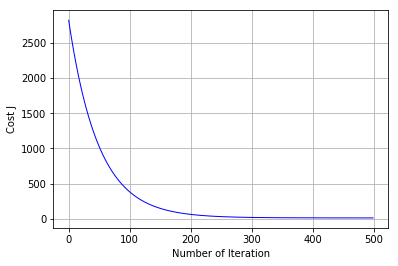

In [57]:
# コストと学習回数のグラフ
plt.plot(range(j_history.size), j_history, "-b", linewidth=1)
plt.xlabel("Number of Iteration")
plt.ylabel("Cost J")
plt.grid(True)
plt.show()

In [58]:
weight

array([[74.57745626],
       [ 2.22894853],
       [ 5.45280885],
       [ 3.22092053]])

In [59]:
mean, mean.shape, std, std.shape

(array([[74.86868687, 74.51515152, 74.01010101]]),
 (1, 3),
 array([[ 8.48486051,  9.86204195, 10.98069467]]),
 (1, 3))

In [60]:
# 検証 = 物理76点, 化学 96点、統計82点を予測
Pysics_norm = (76 - float(mean[:, 0])) / float(std[:, 0])
Science_norm = (96 - float(mean[:, 1])) / float(std[:, 1])
Statistics_norm = (82 - float(mean[:, 2])) / float(std[:, 2])

In [61]:
Pysics_norm, Science_norm, Statistics_norm

(0.1333331443692608, 2.1785395551725504, 0.7276314683530082)

In [62]:
# x0 に 1
pred_padded = np.array([1, Pysics_norm, Science_norm, Statistics_norm])

In [63]:
pred_padded

array([1.        , 0.13333314, 2.17853956, 0.72763147])

In [64]:
# 数学点数の予測
pred = pred_padded.dot(weight)

In [65]:
pred

array([89.09745188])

In [66]:
# 検証 = 物理76点, 化学 96点、統計82点を予測
Test = np.array([[76, 96, 82], [82, 56, 88], [68, 91, 77]])

In [67]:
Test - mean

array([[  1.13131313,  21.48484848,   7.98989899],
       [  7.13131313, -18.51515152,  13.98989899],
       [ -6.86868687,  16.48484848,   2.98989899]])

In [68]:
Test_norm = (Test - mean) / std

In [69]:
Test_norm, Test_norm.shape, Test, mean, std

(array([[ 0.13333314,  2.17853956,  0.72763147],
        [ 0.840475  , -1.87741561,  1.27404499],
        [-0.80952266,  1.67154516,  0.27228687]]), (3, 3), array([[76, 96, 82],
        [82, 56, 88],
        [68, 91, 77]]), array([[74.86868687, 74.51515152, 74.01010101]]), array([[ 8.48486051,  9.86204195, 10.98069467]]))

In [70]:
Test_norm.shape

(3, 3)

In [71]:
np.ones([Test_norm.shape[0], 1])

array([[1.],
       [1.],
       [1.]])

In [72]:
Test_norm = np.hstack((np.ones([Test_norm.shape[0], 1]), Test_norm))

In [73]:
Test_norm

array([[ 1.        ,  0.13333314,  2.17853956,  0.72763147],
       [ 1.        ,  0.840475  , -1.87741561,  1.27404499],
       [ 1.        , -0.80952266,  1.67154516,  0.27228687]])

In [74]:
Test_pred = Test_norm.dot(weight)

In [75]:
Test_pred

array([[89.09745188],
       [70.31724097],
       [82.76470253]])